In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr
import math

In [162]:
coursera = pd.read_csv('coursera_course_dataset.csv')
coursera

,Unnamed: 0,Title,Organization,Skills,Ratings,Review counts,Metadata
0,0,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, ...",4.8,4.8(20K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
1,1,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business C...",4.8,4.8(137K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
2,2,Google Project Management:,Google,"Project Management, Strategy and Operations, ...",4.8,4.8(100K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
3,3,IBM Data Science,IBM,"Python Programming, Data Science, Machine Lea...",4.6,4.6(120K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
4,4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manag...",4.8,4.8(23K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
...,...,...,...,...,...,...,...
979,979,Getting Started with Front-End and Web Develop...,IBM,NaN,NaN,NaN,Beginner · Course
980,980,Conflict Management For Everyone,Arizona State University,NaN,NaN,NaN,Beginner · Specialization · 3 - 6 Months
981,981,Introduction to Microsoft Azure Cloud Services,Microsoft,NaN,NaN,NaN,Beginner · Course · 1 - 4 Weeks
982,982,Healing with the Arts,University of Florida,NaN,NaN,NaN,Mixed · Course · 1 - 3 Months


In [163]:
coursera = pd.read_csv('coursera_course_dataset_v2_no_null.csv')
coursera

,Unnamed: 0,Title,Organization,Skills,Ratings,Review counts,Metadata
0,0,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, ...",4.8,4.8(20K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
1,1,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business C...",4.8,4.8(137K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
2,2,Google Project Management:,Google,"Project Management, Strategy and Operations, ...",4.8,4.8(100K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
3,3,IBM Data Science,IBM,"Python Programming, Data Science, Machine Lea...",4.6,4.6(120K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
4,4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manag...",4.8,4.8(23K reviews),Beginner · Professional Certificate · 3 - 6 Mo...
...,...,...,...,...,...,...,...
618,733,Google Workspace Security,Google Cloud,"Security Engineering, Security Strategy, Soft...",4.7,4.7(762 reviews),Beginner · Course · 1 - 4 Weeks
619,734,Cybersecurity for Tech Professionals,Campus BBVA,"Computer Security Incident Management, System...",4.7,4.7(106 reviews),Intermediate · Course · 1 - 3 Months
620,735,Cybersecurity in the Cloud,University of Minnesota,"Security Engineering, System Security, Networ...",4.3,4.3(127 reviews),Beginner · Specialization · 3 - 6 Months
621,737,Applied Cryptography,University of Colorado System,"Cryptography, Security Engineering, Algorithm...",4.5,4.5(744 reviews),Intermediate · Specialization · 3 - 6 Months


In [164]:
del coursera['Unnamed: 0']

In [165]:
# Разделим на оценку и кол-во оценок:
coursera['Review counts'] = coursera['Review counts'].str.extract("\(([0-9]*K?)") 
coursera

,Title,Organization,Skills,Ratings,Review counts,Metadata
0,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, ...",4.8,20K,Beginner · Professional Certificate · 3 - 6 Mo...
1,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business C...",4.8,137K,Beginner · Professional Certificate · 3 - 6 Mo...
2,Google Project Management:,Google,"Project Management, Strategy and Operations, ...",4.8,100K,Beginner · Professional Certificate · 3 - 6 Mo...
3,IBM Data Science,IBM,"Python Programming, Data Science, Machine Lea...",4.6,120K,Beginner · Professional Certificate · 3 - 6 Mo...
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manag...",4.8,23K,Beginner · Professional Certificate · 3 - 6 Mo...
...,...,...,...,...,...,...
618,Google Workspace Security,Google Cloud,"Security Engineering, Security Strategy, Soft...",4.7,762,Beginner · Course · 1 - 4 Weeks
619,Cybersecurity for Tech Professionals,Campus BBVA,"Computer Security Incident Management, System...",4.7,106,Intermediate · Course · 1 - 3 Months
620,Cybersecurity in the Cloud,University of Minnesota,"Security Engineering, System Security, Networ...",4.3,127,Beginner · Specialization · 3 - 6 Months
621,Applied Cryptography,University of Colorado System,"Cryptography, Security Engineering, Algorithm...",4.5,744,Intermediate · Specialization · 3 - 6 Months


In [166]:
# Также разделим наши метаданные на три показателя - уровень, вид курса и предполагаемое время:
coursera[['Level', 'Type', 'Time']] = coursera['Metadata'].str.split(' · ', expand= True )
del coursera ['Metadata']
coursera

,Title,Organization,Skills,Ratings,Review counts,Level,Type,Time
0,Google Cybersecurity,Google,"Network Security, Python Programming, Linux, ...",4.8,20K,Beginner,Professional Certificate,3 - 6 Months
1,Google Data Analytics,Google,"Data Analysis, R Programming, SQL, Business C...",4.8,137K,Beginner,Professional Certificate,3 - 6 Months
2,Google Project Management:,Google,"Project Management, Strategy and Operations, ...",4.8,100K,Beginner,Professional Certificate,3 - 6 Months
3,IBM Data Science,IBM,"Python Programming, Data Science, Machine Lea...",4.6,120K,Beginner,Professional Certificate,3 - 6 Months
4,Google Digital Marketing & E-commerce,Google,"Digital Marketing, Marketing, Marketing Manag...",4.8,23K,Beginner,Professional Certificate,3 - 6 Months
...,...,...,...,...,...,...,...,...
618,Google Workspace Security,Google Cloud,"Security Engineering, Security Strategy, Soft...",4.7,762,Beginner,Course,1 - 4 Weeks
619,Cybersecurity for Tech Professionals,Campus BBVA,"Computer Security Incident Management, System...",4.7,106,Intermediate,Course,1 - 3 Months
620,Cybersecurity in the Cloud,University of Minnesota,"Security Engineering, System Security, Networ...",4.3,127,Beginner,Specialization,3 - 6 Months
621,Applied Cryptography,University of Colorado System,"Cryptography, Security Engineering, Algorithm...",4.5,744,Intermediate,Specialization,3 - 6 Months


In [167]:
# Разделим навыки на отдельные
coursera['Skills'] = coursera['Skills'].str.split(', ')
coursera

,Title,Organization,Skills,Ratings,Review counts,Level,Type,Time
0,Google Cybersecurity,Google,"[ Network Security, Python Programming, Linux,...",4.8,20K,Beginner,Professional Certificate,3 - 6 Months
1,Google Data Analytics,Google,"[ Data Analysis, R Programming, SQL, Business ...",4.8,137K,Beginner,Professional Certificate,3 - 6 Months
2,Google Project Management:,Google,"[ Project Management, Strategy and Operations,...",4.8,100K,Beginner,Professional Certificate,3 - 6 Months
3,IBM Data Science,IBM,"[ Python Programming, Data Science, Machine Le...",4.6,120K,Beginner,Professional Certificate,3 - 6 Months
4,Google Digital Marketing & E-commerce,Google,"[ Digital Marketing, Marketing, Marketing Mana...",4.8,23K,Beginner,Professional Certificate,3 - 6 Months
...,...,...,...,...,...,...,...,...
618,Google Workspace Security,Google Cloud,"[ Security Engineering, Security Strategy, Sof...",4.7,762,Beginner,Course,1 - 4 Weeks
619,Cybersecurity for Tech Professionals,Campus BBVA,"[ Computer Security Incident Management, Syste...",4.7,106,Intermediate,Course,1 - 3 Months
620,Cybersecurity in the Cloud,University of Minnesota,"[ Security Engineering, System Security, Netwo...",4.3,127,Beginner,Specialization,3 - 6 Months
621,Applied Cryptography,University of Colorado System,"[ Cryptography, Security Engineering, Algorith...",4.5,744,Intermediate,Specialization,3 - 6 Months


In [168]:
def do_ols(x, y):
    x_for_ols = sm.add_constant(x)
    model = sm.OLS(y, x_for_ols)
    results = model.fit()
    print('statsmodels: ', results.summary())
    
    # regression formula --------------------------------
    if results.params[1]>0:
        sign="+"
    else:
        sign="-"
    formula = f"y = {results.params[0]:.2f} {sign} {np.abs(results.params[1]):.2f}*x"
    print("-"*80)
    print("OLS Formula: ", formula)

    # Graphics ================================
    fig = plt.figure(figsize=(16,9), constrained_layout=True)
    gs = fig.add_gridspec(ncols=3, nrows=2)
    ax_main = fig.add_subplot(gs[0,:])
    ax_resid = fig.add_subplot(gs[1,0])
    ax_hist = fig.add_subplot(gs[1,1])
    ax_qqplot = fig.add_subplot(gs[1,2])

    # Scatterplot -----------------------------
    sns.scatterplot(x=x, y=y, ax=ax_main, label="fact")
    ax_main.plot(x, results.predict(), color='red', alpha=0.5, label = formula)
    ax_main.set_title(f"Regression scatterplot. R2={results.rsquared:.2f}", fontsize=14)
    ax_main.legend()

    # Residuals -------------------------------
    sns.scatterplot(x=x, y=results.resid, ax=ax_resid, label="residuals")
    ax_resid.hlines(0, x.min(), x.max(), linestyle='--', colors='red', alpha=0.5)
    ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

    # Hist -------------------------------------
    sns.histplot(results.resid, ax=ax_hist,)
    ax_hist.set_title("Histogram of Residuals", fontsize=14)
    # ax_hist.legend()

    # QQ Plot ----------------------------------
    # sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
    stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
    ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)

    plt.show()

In [169]:
coursera['Time'].unique()

array(['3 - 6 Months', '1 - 3 Months', '1 - 4 Weeks', 'Less Than 2 Hours'],
      dtype=object)

In [170]:
coursera.loc[coursera['Time'] == '3 - 6 Months', 'Time Category'] = 4
coursera.loc[coursera['Time'] == '1 - 3 Months', 'Time Category'] = 3
coursera.loc[coursera['Time'] == '1 - 4 Weeks', 'Time Category'] = 2
coursera.loc[coursera['Time'] == 'Less Than 2 Hours', 'Time Category'] = 1
coursera

,Title,Organization,Skills,Ratings,Review counts,Level,Type,Time,Time Category
0,Google Cybersecurity,Google,"[ Network Security, Python Programming, Linux,...",4.8,20K,Beginner,Professional Certificate,3 - 6 Months,4.0
1,Google Data Analytics,Google,"[ Data Analysis, R Programming, SQL, Business ...",4.8,137K,Beginner,Professional Certificate,3 - 6 Months,4.0
2,Google Project Management:,Google,"[ Project Management, Strategy and Operations,...",4.8,100K,Beginner,Professional Certificate,3 - 6 Months,4.0
3,IBM Data Science,IBM,"[ Python Programming, Data Science, Machine Le...",4.6,120K,Beginner,Professional Certificate,3 - 6 Months,4.0
4,Google Digital Marketing & E-commerce,Google,"[ Digital Marketing, Marketing, Marketing Mana...",4.8,23K,Beginner,Professional Certificate,3 - 6 Months,4.0
...,...,...,...,...,...,...,...,...,...
618,Google Workspace Security,Google Cloud,"[ Security Engineering, Security Strategy, Sof...",4.7,762,Beginner,Course,1 - 4 Weeks,2.0
619,Cybersecurity for Tech Professionals,Campus BBVA,"[ Computer Security Incident Management, Syste...",4.7,106,Intermediate,Course,1 - 3 Months,3.0
620,Cybersecurity in the Cloud,University of Minnesota,"[ Security Engineering, System Security, Netwo...",4.3,127,Beginner,Specialization,3 - 6 Months,4.0
621,Applied Cryptography,University of Colorado System,"[ Cryptography, Security Engineering, Algorith...",4.5,744,Intermediate,Specialization,3 - 6 Months,4.0


In [171]:
coursera.dropna()

,Title,Organization,Skills,Ratings,Review counts,Level,Type,Time,Time Category
0,Google Cybersecurity,Google,"[ Network Security, Python Programming, Linux,...",4.8,20K,Beginner,Professional Certificate,3 - 6 Months,4.0
1,Google Data Analytics,Google,"[ Data Analysis, R Programming, SQL, Business ...",4.8,137K,Beginner,Professional Certificate,3 - 6 Months,4.0
2,Google Project Management:,Google,"[ Project Management, Strategy and Operations,...",4.8,100K,Beginner,Professional Certificate,3 - 6 Months,4.0
3,IBM Data Science,IBM,"[ Python Programming, Data Science, Machine Le...",4.6,120K,Beginner,Professional Certificate,3 - 6 Months,4.0
4,Google Digital Marketing & E-commerce,Google,"[ Digital Marketing, Marketing, Marketing Mana...",4.8,23K,Beginner,Professional Certificate,3 - 6 Months,4.0
...,...,...,...,...,...,...,...,...,...
618,Google Workspace Security,Google Cloud,"[ Security Engineering, Security Strategy, Sof...",4.7,762,Beginner,Course,1 - 4 Weeks,2.0
619,Cybersecurity for Tech Professionals,Campus BBVA,"[ Computer Security Incident Management, Syste...",4.7,106,Intermediate,Course,1 - 3 Months,3.0
620,Cybersecurity in the Cloud,University of Minnesota,"[ Security Engineering, System Security, Netwo...",4.3,127,Beginner,Specialization,3 - 6 Months,4.0
621,Applied Cryptography,University of Colorado System,"[ Cryptography, Security Engineering, Algorith...",4.5,744,Intermediate,Specialization,3 - 6 Months,4.0


In [172]:
coursera['Time Category'] = coursera['Time Category'].astype(int)
coursera['Time Category']

0      4
1      4
2      4
3      4
4      4
      ..
618    2
619    3
620    4
621    4
622    2
Name: Time Category, Length: 623, dtype: int32

statsmodels:                              OLS Regression Results                            
Dep. Variable:          Time Category   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1980
Date:                Sat, 02 Mar 2024   Prob (F-statistic):              0.656
Time:                        14:25:26   Log-Likelihood:                -801.34
No. Observations:                 623   AIC:                             1607.
Df Residuals:                     621   BIC:                             1616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7897      0.834      

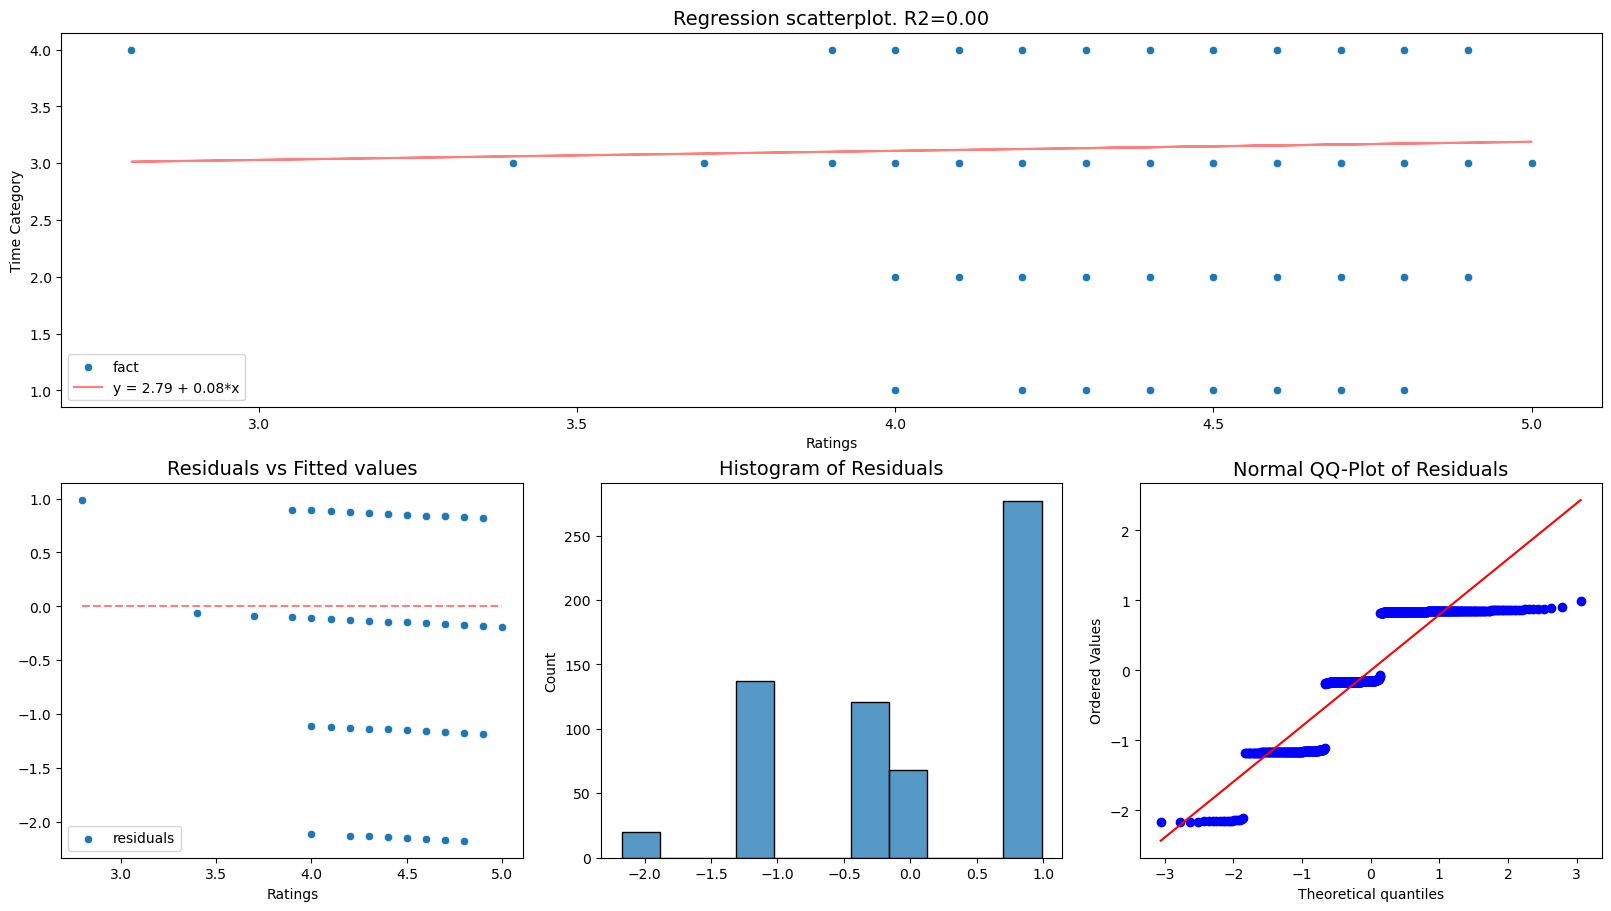

In [173]:
do_ols(coursera['Ratings'], coursera['Time Category'])